# Problem Set 3


## Question 1

Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men


In [2]:
# Step 1
import pandas as pd


In [3]:
# Step 2
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

In [4]:
# Step 3
users = pd.read_csv(url,sep = '|')
users.head()


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
# Step 4. #mean age per occupation

users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [6]:
# Step 5.
Mr = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
Total = Mr[['F','M']].sum(axis=1)
Mr['Male ratio'] = round(100*Mr['M'] / Total)
print(Mr.sort_values(by=['Male ratio'],ascending = False))

gender          F    M  Male ratio
occupation                        
doctor          0    7       100.0
engineer        2   65        97.0
technician      1   26        96.0
retired         1   13        93.0
executive       3   29        91.0
programmer      6   60        91.0
scientist       3   28        90.0
entertainment   2   16        89.0
lawyer          2   10        83.0
salesman        3    9        75.0
educator       26   69        73.0
student        60  136        69.0
other          36   69        66.0
marketing      10   16        62.0
writer         19   26        58.0
none            4    5        56.0
administrator  36   43        54.0
artist         13   15        54.0
librarian      29   22        43.0
healthcare     11    5        31.0
homemaker       6    1        14.0


In [7]:
#Step 6.

users.groupby('occupation')['age'].agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [8]:
#Step 7.

users.groupby(['occupation','gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [13]:
# Step 8: 

gender_percentage_per_occupation = users.groupby(['occupation', 'gender']).size() / users.groupby('occupation').size()
print(gender_percentage_per_occupation)

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

## Question 2


Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start 
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [14]:
# 1
import pandas as pd

In [16]:
# 2

url2='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

In [17]:
#3
euro12=pd.read_csv(url2)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [18]:
#4
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [19]:
#5
euro12['Team'].count()


16

In [20]:
#6

len(euro12.columns)

35

In [21]:
#7

discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


In [22]:
#8

discipline.sort_values(by=['Red Cards','Yellow Cards'],ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [23]:
#9
euro12.groupby(['Team'])['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [24]:
#10
euro12[euro12['Goals']>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [25]:
#11
euro12[euro12['Team'].str.contains('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [26]:
#12
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [27]:
#13
euro12[euro12.columns[:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [28]:
#14
accuracy=euro12[euro12.Team.isin(['England','Italy','Russia'])]
accuracy[['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3

Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299


In [1]:
# Step 1
import pandas as pd
import numpy as np

In [2]:
#Step 2.

series1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
series1

0     1
1     1
2     2
3     4
4     1
     ..
95    2
96    2
97    2
98    4
99    3
Length: 100, dtype: int32

In [3]:
series2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
series2

0     1
1     3
2     1
3     3
4     2
     ..
95    3
96    1
97    3
98    1
99    1
Length: 100, dtype: int32

In [4]:
series3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))
series3

0     20447
1     27894
2     27044
3     26278
4     17882
      ...  
95    25911
96    16697
97    29552
98    27141
99    24412
Length: 100, dtype: int32

In [5]:
#3

df = pd.DataFrame({'series1':series1,'series2':series2,'series3':series3})
df.head(10)

,series1,series2,series3
0,1,1,20447
1,1,3,27894
2,2,1,27044
3,4,3,26278
4,1,2,17882
5,1,3,22998
6,4,1,11677
7,3,1,12769
8,3,3,18357
9,2,3,18246


In [6]:
#4

df_new=df.rename(columns={'series1':'beds','series2':'bathrs', 'series3':'price_sqr_meter'})
df_new

,beds,bathrs,price_sqr_meter
0,1,1,20447
1,1,3,27894
2,2,1,27044
3,4,3,26278
4,1,2,17882
...,...,...,...
95,2,3,25911
96,2,1,16697
97,2,3,29552
98,4,1,27141


In [7]:
#5
bigcolumn = df_new['beds'].append(df_new['bathrs'].append(df_new['price_sqr_meter']))
bigcolumn


C:\Users\HP\AppData\Local\Temp\ipykernel_3320\1872562291.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bigcolumn = df_new['beds'].append(df_new['bathrs'].append(df_new['price_sqr_meter']))


0         1
1         1
2         2
3         4
4         1
      ...  
95    25911
96    16697
97    29552
98    27141
99    24412
Length: 300, dtype: int32

In [8]:
#6
if (max(bigcolumn.index)==99):
    print('True')
else:
    print('False')

True


## Question 4


Wind Statistics 
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or 
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL 
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on 
January 2 1961) for the first 52 weeks.

In [36]:
import pandas as pd

data = pd.read_csv('wind.txt', delim_whitespace=True)

data['date'] = data['Yr'].astype(str) + '-' + data['Mo'].astype(str) + '-' + data['Dy'].astype(str)
data['date'] = pd.to_datetime(data['date'])
data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)
data.set_index('date', inplace=True)

def fix_year(year):
    if year > 2000:
        return year - 100
    else:
        return year

data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))

data.index = pd.to_datetime(data.index)

missing_values_per_location = data.isnull().sum()

non_missing_values_total = data.notnull().sum().sum()

mean_windspeed = data.mean().mean()

loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})

january_avg_windspeed = data[data.index.month == 1].mean()

data_yearly = data.resample('Y').mean()

data_monthly = data.resample('M').mean()


data_weekly = data.resample('W').mean()

weekly_stats = data_weekly.head(52).agg(['min', 'max', 'mean', 'std'])

print("Number of missing values for each location:")
print(missing_values_per_location)

print("\nNumber of non-missing values in total:", non_missing_values_total)

print("\nMean windspeeds over all the locations and times:", mean_windspeed)

print("\nLocation-wise statistics:")
print(loc_stats)

print("\nDay-wise statistics:")
print(day_stats)

print("\nAverage windspeed in January for each location:")
print(january_avg_windspeed)

print("\nYearly downsampling:")
print(data_yearly)

print("\nMonthly downsampling:")
print(data_monthly)

print("\nWeekly downsampling for first 52 weeks:")
print(weekly_stats)

Number of missing values for each location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Number of non-missing values in total: 78857

Mean windspeeds over all the locations and times: 10.227982360836938

Location-wise statistics:
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Day-wise statistics:
             min    max       mean       std
date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188

## Question 5

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [37]:
import pandas as pd

data_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(data_url, delimiter='\t')

print("Step 4: First 10 entries:")
print(chipo.head(10))

num_observations = chipo.shape[0]

num_columns = chipo.shape[1]

columns_names = chipo.columns.tolist()

dataset_indexing = chipo.index

most_ordered_item = chipo['item_name'].mode().values[0]

most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()

most_ordered_choice_description = chipo['choice_description'].mode().values[0]


total_items_ordered = chipo['quantity'].sum()

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

revenue_period = chipo['item_price'].sum()


num_orders_made = chipo['order_id'].nunique()

average_revenue_per_order = revenue_period / num_orders_made

num_different_items_sold = chipo['item_name'].nunique()

print("\nNumber of observations in the dataset:", num_observations)

print("\nNumber of columns in the dataset:", num_columns)

print("\nName of all columns:", columns_names)

print("\nDataset indexing:", dataset_indexing)

print("\nMost-ordered item:", most_ordered_item)

print("\nQuantity of most-ordered item:", most_ordered_item_count)

print("\n Most-ordered item in choice_description:", most_ordered_choice_description)

print("\nTotal items ordered:", total_items_ordered)

print("\nItem price type after conversion:", chipo['item_price'].dtype)

print("\nRevenue for the period:", revenue_period)

print("\nNumber of orders made in the period:", num_orders_made)

print("\nAverage revenue amount per order:", average_revenue_per_order)

print("\nNumber of different items sold:", num_different_items_sold)


Step 4: First 10 entries:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3    

## Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

Index(['Year', 'Marriages', 'Divorces', 'Population', 'Marriages_per_1000',
       'Divorces_per_1000'],
      dtype='object')


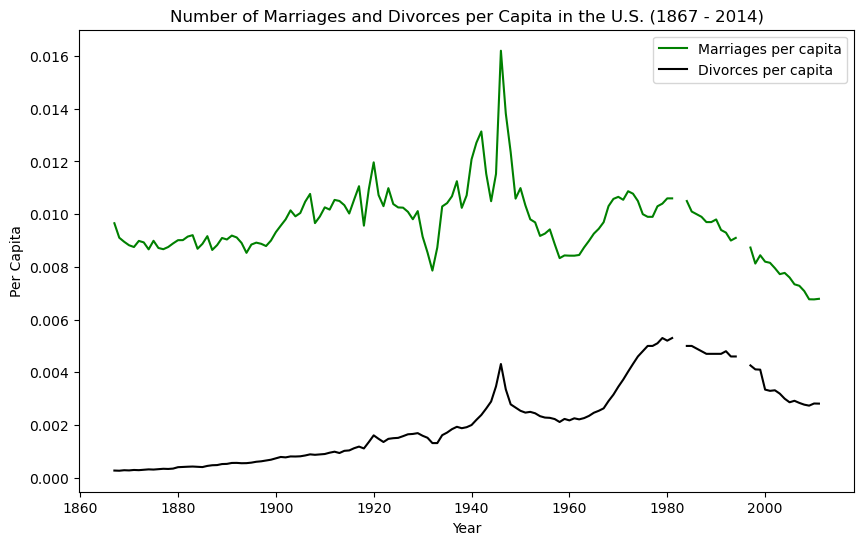

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Print column names to verify the correct column names
print(df.columns)

# Calculate the per capita values for marriages and divorces
df['Marriages_per_capita'] = df['Marriages'] / df['Population']
df['Divorces_per_capita'] = df['Divorces'] / df['Population']

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Marriages_per_capita'], label='Marriages per capita', color='green')
plt.plot(df['Year'], df['Divorces_per_capita'], label='Divorces per capita', color='black')

plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867 - 2014)')
plt.legend()

plt.show()

## Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

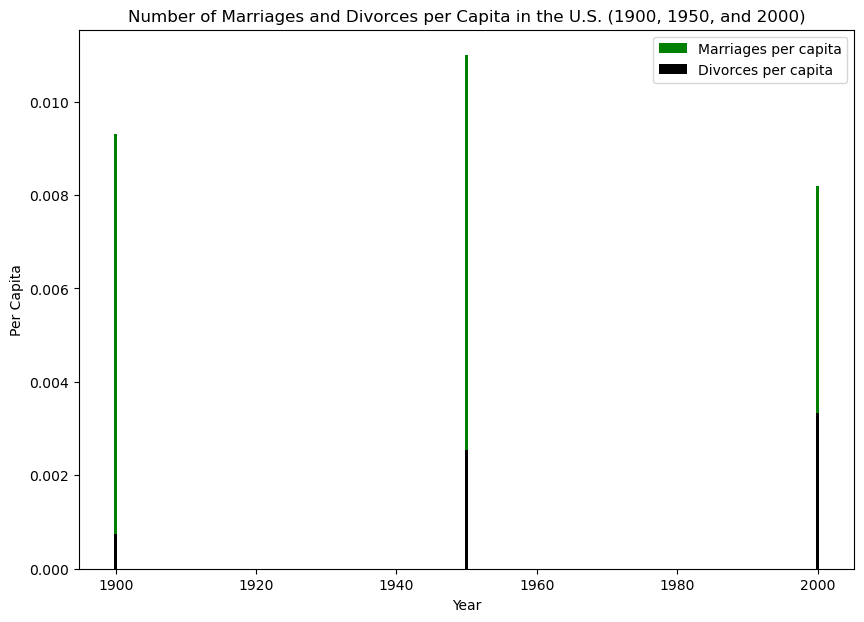

In [41]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the necessary data for marriages and divorces per capita in a DataFrame called 'df'

# Filter data for the years 1900, 1950, and 2000
years = [1900, 1950, 2000]
filtered_df = df[df['Year'].isin(years)]

# Create the vertical bar chart
plt.figure(figsize=(10, 7))
plt.bar(filtered_df['Year'], filtered_df['Marriages_per_capita'], label='Marriages per capita', color='green', width=0.4)
plt.bar(filtered_df['Year'], filtered_df['Divorces_per_capita'], label='Divorces per capita', color='black', width=0.4)

plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1900, 1950, and 2000)')
plt.legend()

plt.show()

## Question 8 

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

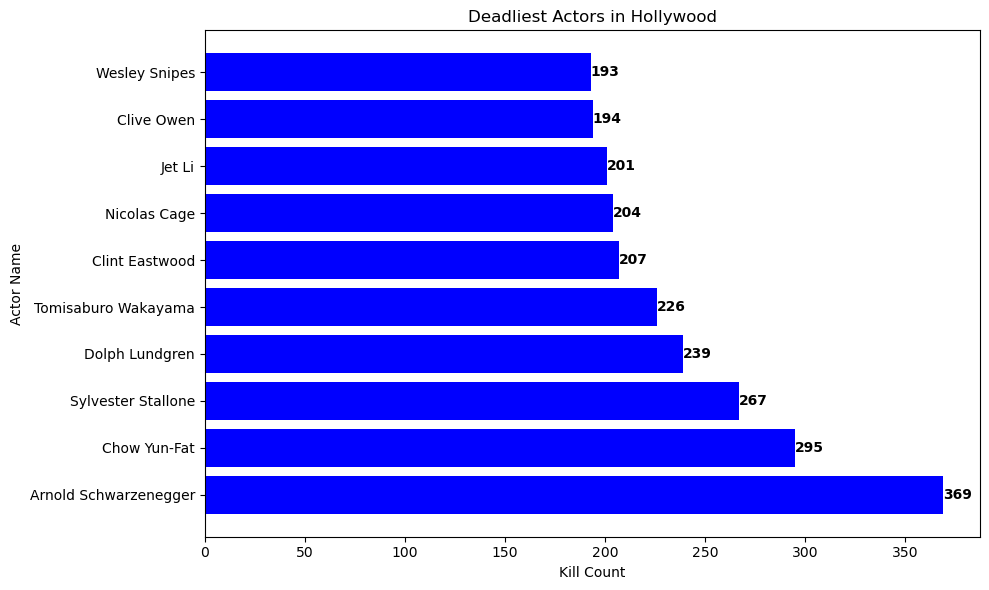

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the data from the CSV file into a DataFrame
actors_df = pd.read_csv('actor_kill_counts.csv')

# Step 2: Sort the DataFrame by the kill count in descending order
sorted_actors_df = actors_df.sort_values(by='Count', ascending=False)

# Step 3: Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_actors_df['Actor'], sorted_actors_df['Count'], color='blue')

plt.xlabel('Kill Count')
plt.ylabel('Actor Name')
plt.title('Deadliest Actors in Hollywood')
plt.tight_layout()  # Ensures all labels are visible

# Step 4: Label each bar with the corresponding actor's name
for i, count in enumerate(sorted_actors_df['Count']):
    plt.text(count, i, str(count), ha='left', va='center', color='black', fontweight='bold')

plt.show()

## Question 9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories

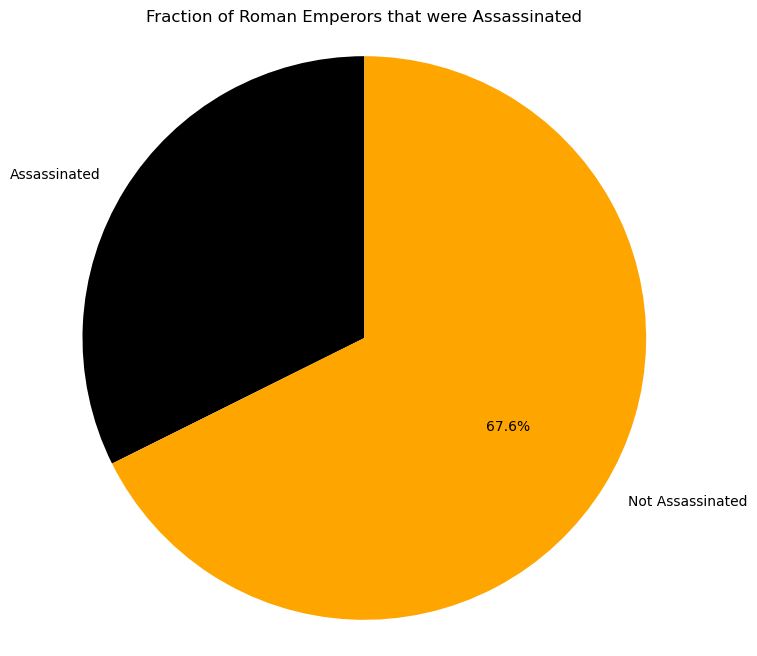

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


emperors_df = pd.read_csv('roman-emperor-reigns.csv')

num_assassinated_emperors = emperors_df[emperors_df['Cause_of_Death'] == 'Assassinated'].shape[0]

total_emperors = len(emperors_df)

fraction_assassinated = num_assassinated_emperors / total_emperors

fraction_not_assassinated = 1 - fraction_assassinated

plt.figure(figsize=(8, 8))
labels = ['Assassinated', 'Not Assassinated']
sizes = [fraction_assassinated, fraction_not_assassinated]
colors = ['black', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal') 
plt.title('Fraction of Roman Emperors that were Assassinated')

plt.show()


## Question 10

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

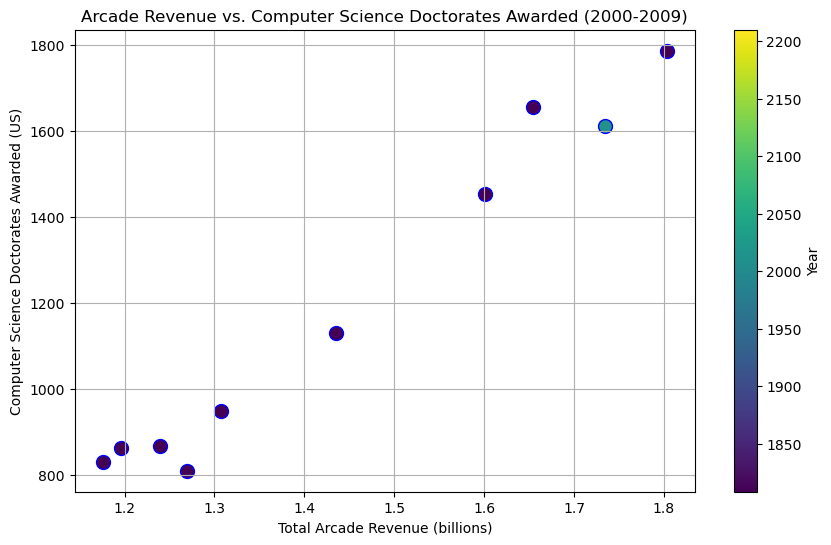

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

plt.figure(figsize=(10, 6))
for year, revenue, cs_phds in zip(df['Year'], df['Total Arcade Revenue (billions)'], df['Computer Science Doctorates Awarded (US)']):
    plt.scatter(revenue, cs_phds, c=year, cmap='viridis', edgecolors='blue', s=100)

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Arcade Revenue vs. Computer Science Doctorates Awarded (2000-2009)')

cbar = plt.colorbar()
cbar.set_label('Year')

plt.grid(True)
plt.show()